# PREPROCESING


In [23]:
import pandas as pd

df = pd.read_csv(r'C:\Users\MSI\Downloads\kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
df.isnull().sum().sum()

0

# VISUALISATION

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 20 , 20) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

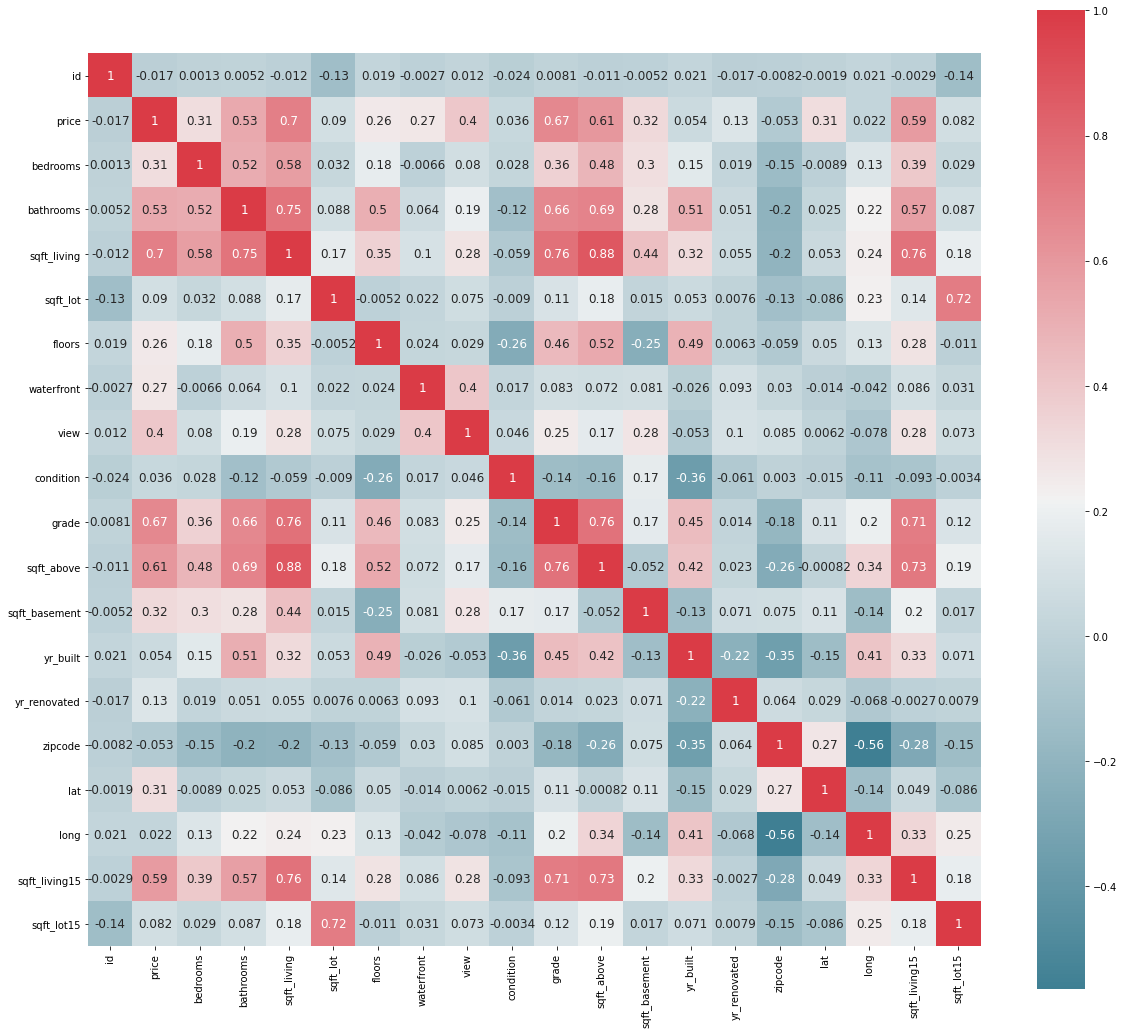

In [27]:
plot_correlation_map(df)

THE FEATURES WITH THE HIGHEST CORRELATION WITH PRICE ARE SQFT_LIVING WITH 0.7 AND GRADE 0.67

# LINEAR REGRESSION

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np


In [29]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [30]:
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62451720102.954
R squared 0.5035535751151091


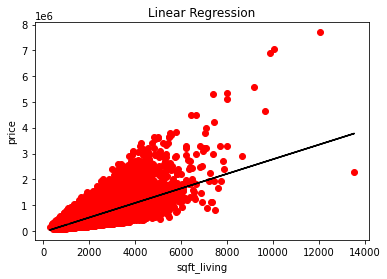

In [31]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

the graph shows that the linear model does not offer an accurate representation of the data of the set.

# MULTILINEAR REGRESSION

In [33]:
x=df[["sqft_living","grade"]]  
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 57296260421.90226
R squared 0.54453578542216


 multi-linear regression R squared is higher by 0.04 compared to the linear model so it offer a better prediction model

In [34]:
x=df[["sqft_living","grade","sqft_above","sqft_living15"]]  
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 56342857568.813736
R squared 0.5521146549410552


# POLYNOMIAL REGRESSION

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

In [36]:
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_=poly.fit_transform(x)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_,y,test_size=0.2,random_state=40) 


lg.fit(x_train,y_train) 
predicted=lg.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 48667701676.22338
R squared 0.6131266446353223


 multi-linear regression R squared is higher by 0.11 compared to the linear model and higher than the multilinear regression 
 so it offer a better prediction model of the house price 